# Univariate Linear Regression

In [1]:
# Import libraries
get_ipython().magic('matplotlib inline')
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from numpy.linalg import inv
import itertools
from scipy.optimize import fmin_cg
import matplotlib.pyplot as plt

In [2]:
#Linear regression with one variable
df = pd.read_csv('/Users/wiseer85/Documents/Data Science/ML Exercises/data/ex1data1.txt', names = ['Population','Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


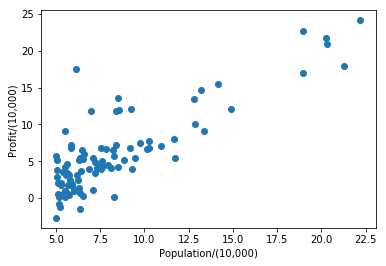

In [3]:
#Plot the data with scaled units
plt.scatter(df['Population'], df['Profit'])
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')

In [4]:
#Create "X" matrix and "y" vector
x = df.as_matrix(columns = ['Population'])
y = df.as_matrix(columns = ['Profit'])

#Number of examples
m = x.shape[0]

#Number of features + 1
n = x.shape[1] + 1

#Initialize fitting parameters
theta_initial = np.zeros(n)

In [5]:
# Normalize data
def normalize_data(x):
    # normalizaing such that data has mean 0 and std of 1
    mu = x.mean()
    sigma = x.std()
    x = (x - mu) / sigma
    return (x, mu, sigma)

def add_column_ones(x):
    x = np.append(np.ones((x.shape[0], 1)), x, axis = 1)
    return x

#Function that we want minimized
def cost_function(theta, x, y):
    theta = theta.reshape((len(theta), 1))
    pred = np.dot(x, theta)
    J = np.mean((pred - y) ** 2) / 2
    return J

#Gradient of costFunction
def gradient(theta, x, y):
    theta = theta.reshape((len(theta), 1))
    pred = np.dot(x, theta)
    grad = np.dot(x.T, pred - y) / m
    return grad.flatten()

#Prediction for data x using parameters theta
def prediction(theta, x, mu = 0, sigma = 1):
    theta = theta.reshape((len(theta), 1))
    x = x.reshape(len(x), 1)
    x = (x - mu) / sigma
    x = add_column_ones(x)
    pred = np.dot(x, theta)
    return pred

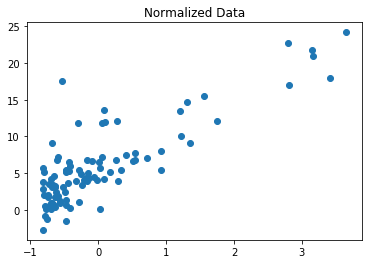

In [6]:
#Normalize data and plot it
X, mu, sigma = normalize_data(x)
plt.scatter(X,y)
plt.title('Normalized Data')
X = add_column_ones(X)

Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
The fitting parameters that minimize the costFunction are Theta = (5.839135,4.593041).


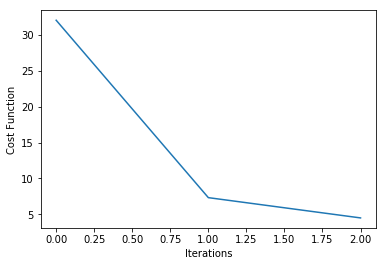

In [7]:
#Perform the minimization of the cost function with the use of its gradient
theta, thetas = fmin_cg(cost_function, theta_initial, fprime = gradient, 
                         args = (X, y), retall = 1, disp = 1)

# Calculate the evolution of the costFunction with every iteration
J = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    J[i] = cost_function(theta, X, y)
    
plt.plot(range(J.size), J)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
print('The fitting parameters that minimize the costFunction are Theta = (%f,%f).' %(theta[0],theta[1]))

This curve achieves a cost function of J = 4.476971


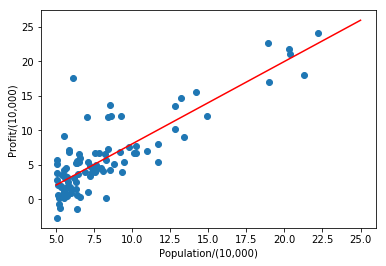

In [8]:
# Plot the regression line on top of scatter plot
population = np.linspace(5,25,100)
pred = prediction(theta, population, mu, sigma)

plt.scatter(df['Population'], df['Profit'])
plt.plot(population, pred, 'r')
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')

print('This curve achieves a cost function of J = %f' % J[-1])